In [1]:
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Iteration-4').getOrCreate()

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/05/10 01:00:12 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [2]:
file_path = "trip_1.csv"
file1_path = "weather_1.csv"

In [3]:
df = spark.read.csv(file_path, header=True, inferSchema=True)
df_1 = spark.read.csv(file1_path, header=True, inferSchema=True)

In [4]:
df.printSchema()
df.show(5)

root
 |-- trip_id: integer (nullable = true)
 |-- startdate: string (nullable = true)
 |-- starttime: string (nullable = true)
 |-- stopdata: string (nullable = true)
 |-- stoptime: string (nullable = true)
 |-- bikeid: string (nullable = true)
 |-- tripduration: double (nullable = true)
 |-- from_station_name: string (nullable = true)
 |-- to_station_name: string (nullable = true)
 |-- from_station_id: string (nullable = true)
 |-- to_station_id: string (nullable = true)
 |-- usertype: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- birthyear: integer (nullable = true)

+-------+---------+---------+--------+--------+--------+------------+--------------------+--------------------+---------------+-------------+--------------------+------+---------+
|trip_id|startdate|starttime|stopdata|stoptime|  bikeid|tripduration|   from_station_name|     to_station_name|from_station_id|to_station_id|            usertype|gender|birthyear|
+-------+---------+---------+--------+----

In [5]:
df_1.printSchema()
df_1.show(5)

root
 |-- startdate: string (nullable = true)
 |-- Max_Temperature_F: integer (nullable = true)
 |-- Mean_Temperature_F: integer (nullable = true)
 |-- Min_TemperatureF: integer (nullable = true)
 |-- Max_Dew_Point_F: integer (nullable = true)
 |-- MeanDew_Point_F: integer (nullable = true)
 |-- Min_Dewpoint_F: integer (nullable = true)
 |-- Max_Humidity: integer (nullable = true)
 |-- Mean_Humidity: integer (nullable = true)
 |-- Min_Humidity: integer (nullable = true)
 |-- Max_Sea_Level_Pressure_In: double (nullable = true)
 |-- Mean_Sea_Level_Pressure_In: double (nullable = true)
 |-- Min_Sea_Level_Pressure_In: double (nullable = true)
 |-- Max_Visibility_Miles: integer (nullable = true)
 |-- Mean_Visibility_Miles: integer (nullable = true)
 |-- Min_Visibility_Miles: integer (nullable = true)
 |-- Max_Wind_Speed_MPH: integer (nullable = true)
 |-- Mean_Wind_Speed_MPH: integer (nullable = true)
 |-- Max_Gust_Speed_MPH: integer (nullable = true)
 |-- Precipitation_In: double (nullable

In [6]:
df.show(10)

+-------+---------+---------+--------+--------+--------+------------+--------------------+--------------------+---------------+-------------+--------------------+------+---------+
|trip_id|startdate|starttime|stopdata|stoptime|  bikeid|tripduration|   from_station_name|     to_station_name|from_station_id|to_station_id|            usertype|gender|birthyear|
+-------+---------+---------+--------+--------+--------+------------+--------------------+--------------------+---------------+-------------+--------------------+------+---------+
|      1| 1/1/2016|     0:36|1/1/2016|    0:48|SEA00480|     734.096|PATH / 9th Ave & ...|Summit Ave & E De...|         SLU-07|        CH-01|Short-Term Pass H...|     M|     null|
|      2| 1/1/2016|     0:43|1/1/2016|    0:54|SEA00392|     644.455|Bellevue Ave & E ...|Dexter Ave N & Al...|          CH-12|       SLU-02|              Member|  Male|     1982|
|      3| 1/1/2016|     0:47|1/1/2016|    1:05|SEA00276|    1078.579|Key Arena / 1st A...| 1st Ave &

In [7]:
df_1.show(10)

+---------+-----------------+------------------+----------------+---------------+---------------+--------------+------------+-------------+------------+-------------------------+--------------------------+-------------------------+--------------------+---------------------+--------------------+------------------+-------------------+------------------+----------------+---------+
|startdate|Max_Temperature_F|Mean_Temperature_F|Min_TemperatureF|Max_Dew_Point_F|MeanDew_Point_F|Min_Dewpoint_F|Max_Humidity|Mean_Humidity|Min_Humidity|Max_Sea_Level_Pressure_In|Mean_Sea_Level_Pressure_In|Min_Sea_Level_Pressure_In|Max_Visibility_Miles|Mean_Visibility_Miles|Min_Visibility_Miles|Max_Wind_Speed_MPH|Mean_Wind_Speed_MPH|Max_Gust_Speed_MPH|Precipitation_In|   Events|
+---------+-----------------+------------------+----------------+---------------+---------------+--------------+------------+-------------+------------+-------------------------+--------------------------+-------------------------+-------

In [8]:
df.show()

+-------+---------+---------+--------+--------+--------+------------+--------------------+--------------------+---------------+-------------+--------------------+------+---------+
|trip_id|startdate|starttime|stopdata|stoptime|  bikeid|tripduration|   from_station_name|     to_station_name|from_station_id|to_station_id|            usertype|gender|birthyear|
+-------+---------+---------+--------+--------+--------+------------+--------------------+--------------------+---------------+-------------+--------------------+------+---------+
|      1| 1/1/2016|     0:36|1/1/2016|    0:48|SEA00480|     734.096|PATH / 9th Ave & ...|Summit Ave & E De...|         SLU-07|        CH-01|Short-Term Pass H...|     M|     null|
|      2| 1/1/2016|     0:43|1/1/2016|    0:54|SEA00392|     644.455|Bellevue Ave & E ...|Dexter Ave N & Al...|          CH-12|       SLU-02|              Member|  Male|     1982|
|      3| 1/1/2016|     0:47|1/1/2016|    1:05|SEA00276|    1078.579|Key Arena / 1st A...| 1st Ave &

In [9]:
df.columns

['trip_id',
 'startdate',
 'starttime',
 'stopdata',
 'stoptime',
 'bikeid',
 'tripduration',
 'from_station_name',
 'to_station_name',
 'from_station_id',
 'to_station_id',
 'usertype',
 'gender',
 'birthyear']

In [10]:
df.describe().show()

+-------+------------------+---------+---------+--------+--------+--------+------------------+--------------------+--------------------+---------------+-------------+--------------------+------+------------------+
|summary|           trip_id|startdate|starttime|stopdata|stoptime|  bikeid|      tripduration|   from_station_name|     to_station_name|from_station_id|to_station_id|            usertype|gender|         birthyear|
+-------+------------------+---------+---------+--------+--------+--------+------------------+--------------------+--------------------+---------------+-------------+--------------------+------+------------------+
|  count|             48984|    48984|    48984|   48984|   48984|   48984|             48984|               48984|               48984|          48984|        48984|               48984| 48984|             31270|
|   mean|           24492.5|     null|     null|    null|    null|    null|1264.9614109709287|                null|                null|        

In [11]:
birthyear_counts = df.groupBy('birthyear').count().orderBy('birthyear')
birthyear_counts_pandas = birthyear_counts.toPandas()
plt.figure(figsize=(10, 6))
plt.hist(birthyear_counts_pandas['birthyear'], bins=30, edgecolor='black')
plt.title('Distribution of Birth Years')
plt.xlabel('Birth Year')
plt.ylabel('Count')
plt.show()

NameError: name 'plt' is not defined

In [12]:
import matplotlib.pyplot as plt

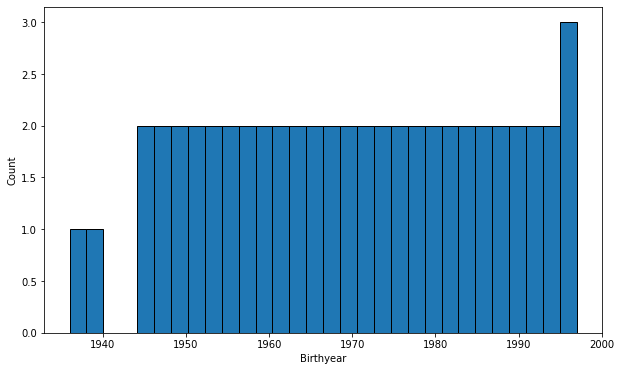

In [21]:
birthyear_counts = df.groupBy('birthyear').count().orderBy('birthyear')
birthyear_counts_pandas = birthyear_counts.toPandas()
plt.figure(figsize=(10, 6))
plt.hist(birthyear_counts_pandas['birthyear'], bins=30, edgecolor='black')

plt.xlabel('Birthyear')
plt.ylabel('Count')
plt.show()

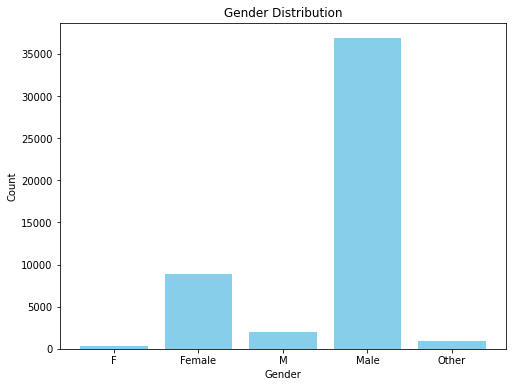

In [15]:
gender_counts = df.groupBy('gender').count().orderBy('gender')


gender_counts_pandas = gender_counts.toPandas()

plt.figure(figsize=(8, 6))
plt.bar(gender_counts_pandas['gender'], gender_counts_pandas['count'], color='skyblue')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

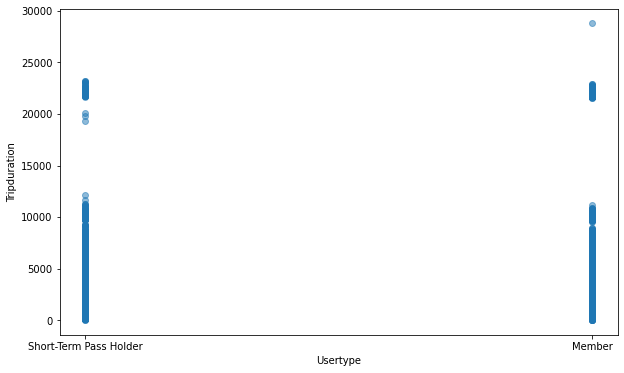

In [17]:
pandas_df = df.select('usertype', 'tripduration').toPandas()


plt.figure(figsize=(10, 6))
plt.scatter(pandas_df['usertype'], pandas_df['tripduration'], alpha=0.5)
plt.xlabel('Usertype')
plt.ylabel('Tripduration')
plt.show()

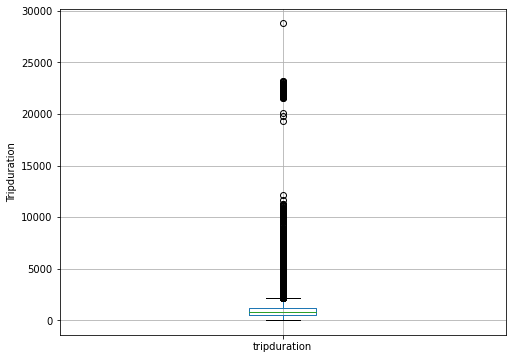

In [18]:
plt.figure(figsize=(8, 6))
pandas_df.boxplot(column='tripduration')

plt.ylabel('Tripduration')
plt.show()

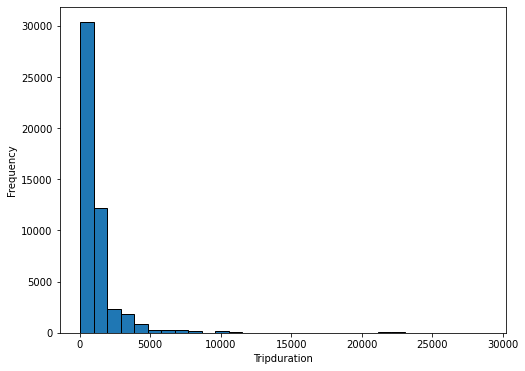

In [19]:
plt.figure(figsize=(8, 6))
plt.hist(pandas_df['tripduration'], bins=30, edgecolor='black')

plt.xlabel('Tripduration')
plt.ylabel('Frequency')
plt.show()

In [22]:
df.select('gender').show()

+------+
|gender|
+------+
|     M|
|  Male|
|  Male|
|  Male|
|  Male|
|  Male|
|Female|
|  Male|
|  Male|
|  Male|
|  Male|
|  Male|
|     M|
|  Male|
|  Male|
|     M|
|  Male|
|  Male|
|  Male|
|  Male|
+------+
only showing top 20 rows

